### 기본세팅

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)

In [ ]:
from sklearn.datasets import load_boston

boston_houseprice_data = load_boston()

df = pd.DataFrame(
    data = boston_houseprice_data.data, 
    columns = boston_houseprice_data.feature_names
)
rooms = np.array(df['RM'])
sample = np.array(df['RM'])[:20]

In [3]:
p_mean, s_mean = np.mean(rooms), np.mean(sample)
p_mean, s_mean

(6.285, 6.192)

In [4]:
p_var, s_var = np.var(rooms), np.var(sample, ddof=1)
p_var, s_var

(0.493, 0.232)

---

### 통계적 가설검정(Statistical Hypothesis Testing

- 모집단의 모수에 관하여 두 가지 가설을 세우고, 표본으로부터 계산되는 통계량을  이용하여 어느 가설이 옳은지 판단하는 통계적인 방법


**귀무가설(H0, Null Hypothesis)**

- 대립가설의 반대되는 개념

**대립가설(H1, Alternative Hypothesis)**

-  주장하고 싶은 가설

- 주로 유의미한 차이가 있는지 효과가 있는지 주장

**예시**

- 정책으로 예시를 들면, 기존의 정책이 귀무가설이고, 기존의 정책 대비 비용이 많이 들더라도 새로운 정책을 만들고 유의미한 정책을 주장하고 싶다면 대립가설로 가정

<br>

**귀무가설 기각/채택**

- 기각: 귀무가설은 옳지 않다(->새로운 정책이 유의미하다)

- 채택: 귀무가설이 옳지 않다고 할 수 없다.(귀무가설이 옳다는 의미는 아님)

<br>

### 통계적 가설검정 용어

**유의하다(Significant)**

- 귀무가설을 기각/채택의 판단은 귀무가설으 바탕으로 표본을 통해서 계산된 통계량이 특정 신뢰수준 범위내에서 보기 드문 값이지 여부를 통해서 결정

- 보기 드문 값이라면 귀무가설 기각

- 그렇지 않다면, 귀무가설 채택

**예시**

보스턴 주택의 평균 방 수가 6보다 크다라는 대립가설과 6보다 작거나 같다라는 귀무가설을 통해 모평균이 6으로 가정되고, 표폰 추출 시 95%의 확률로 표본평균 값 <=6.164라는 조건 만족

예시 데이터처럼 6.164범위보다 바깥에 존재하는 표본평균은 6.192는 보기 드문 값이므로  귀무가설은 기각.

<br>

**기각역/채택역**

- 기각역: 귀무가설이 기각되는 구간

(표본평균 > 6.164라면 귀무가설은 기각되므로 표본평균>6.164가 기각역이다.)

- 채택역: 귀무가설이 채택되는 구간



(표본평균 <= 6.164라면 귀무가설은 기각되므로 표본평균<=6.164가 기각역이다.)





### 가설검정의 순서도

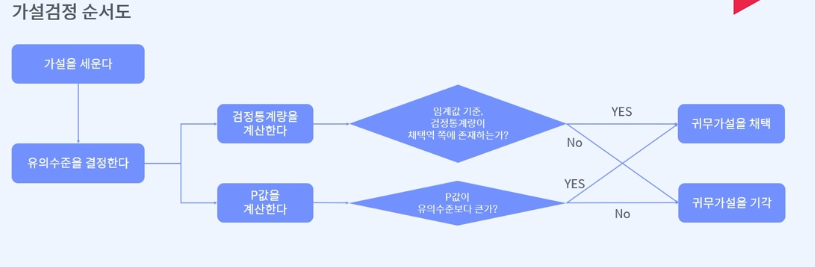

In [7]:
## 예시

# 모집단이 정규분포를 따르고 모분산이 0.2임을 알고 있다
# 보스턴의 가구당 평균 방 숙 6보다 큰지 여부 파악
# 모평균이 6이라는 가정
# 그 가정을 바탕으로 20개의 표본은X1,X2,X3...,X20 ~ N(6,0.2)를 따른다
# 표본퍙균~N(6,0.2,20)
#표본평균의 P = 0.05를 만족하는 x를 찾는다.

rv = stats.norm(6,np.sqrt(0.2/20))
rv.isf(0.05)
#5%확률로 표본평균이 6.6164를 넘으므로 실제로 모평균이 6보다 클 수 있을 것 같다.라는 결론을 내리는 것을 가설검증 

6.164

### 통계적 가설검정 용어

**유의수준(신뢰수준, Level of Significance)**

- 표본평균이 기가역에 들아갈 확률 a

(주황색으로 칠해진 영역의 면적, 예시=0.05)

<br>

**임계값(Critical Value)**

- 경계선상의 값(예시:6.164)

<br>

**검정통계량(Test Statistic)**

- 검정에 사용될 통계랑(예시=6.192)


<br>

**p값(p-value)**

- 검정통계량 기준으로 바깥영역의 면적

(초록색으로 칠해진 영역의 면접, 예시=0.028)

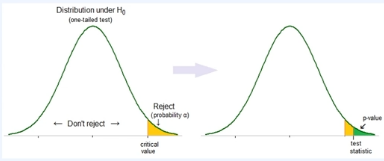





In [8]:
z = (s_mean - 6) / np.sqrt(0.2/20)
z

1.919

In [10]:
rv = stats.norm()
rv.isf(0.95)

-1.645

In [11]:
rv.cdf(z)

0.972

### 단측검정 & 양측검정

**단측검정**

- 한 방향으로만 검정을 수행하는 방법

- 예시: 대립가설이 모평균 > 6 혹은 모평균 < 6

**양측검정**

- 양방향으로 검정을 수행하는 방법

- 예시: 대립가설이 모평균 != 6일 때

<br>

**단측검정 & 양측검정 주의할 점

- 기각역이 다르다

   - 단측검정은 한쪽 방향으로 기각역 범위가 a이다

   - 양측검정은 양쪽 방향으로 기각역 범위가 a/2이다.


In [13]:
z = (s_mean-6) / np.sqrt(0.2/20)
z

1.919

In [16]:
rv = stats.norm()
rv.interval(0.95)

(-1.960, 1.960)

In [17]:
rv.cdf(z) * 2

1.945

### 가설검정의 두 가지 오류


**제 1종 오류**

- 귀무가설이 옳을 때, 귀무가설을 기각하는 오류


- 현 정책을 유지하는 것과 큰 차이가 없음에도, 막대한 비용을 들여서 새로운 정책을 시도하는 오류

   - (안 고쳐도 되는 걸 고치게 했으니 시간.돈 낭비)

- 하지 말아야할 것을 행한 것으로 오탐(False Positive)

- 제 1종 오류를 범할 확률은 위험률 a(알파)라고 하고 유의수준과 일치

- 분석기가 제어할 수 있는 오류

   - 주어진 유의수준에 맞추어서 분석가가 의사결정을 할 수 있다.


<br>

**제 2종 오류**

- 대립가설이 옳을 때, 귀무가설을 채택하는 오류

- 새로운 정책으로 변화가 유의미함에도 큰 비용을 들이지 않는 현 정책을 고수하는 오류

   - (고쳐야 되는데 안 고쳤으니 훗날 문제가 생길 것)

- 행해야할 것을 제대로 인식하지 못했으므로 미탐(False Negative)

- 제 2종 오류를 범할 확률은 b(베타)라고 하며, 1-b를 검정력(power)

- 분석기가 제어할 수 없는 오류

   - 분석가가 제어할 수 없는 비대칭 정보에 의하여 귀무가설 채택


<br>

*Positive: 귀무가설 기각*

*Negative: 귀무가설 기각의 실패*



In [18]:
rv = stats.norm(6, np.sqrt(0.2))

In [19]:
#제 1종 오류
# 평균이 6인데 6보다 크다는 결론을 내리는 상황
c = stats.norm().isf(0.05)
n_samples = 10000
cnt = 0

for _ in range(n_samples):
    sample_ = np.round(rv.rvs(20),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean-6) / np.sqrt(0.2/20)

    if z>c:
        cnt +=1
cnt / n_samples

1.000

In [20]:
c

1.645

In [21]:
#제 2종 오류
#평균이 6이상인데 6이랑이라는 결론을 얻을 수 없는 상황
#비대칭정보 모평균=6.15
#비대칭정보를 기반으로 샘플링이 될 때 이러한 오류가 날 확률을 할 수 있다.
#모평균을 몰라서 생기는 오류이다.
rv = stats.norm(6.15, np.sqrt(0.2))


In [22]:
c = stats.norm().isf(0.05)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(20),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ -6) /np.sqrt(0.2/20)
    if z<=c:
        cnt +=1
cnt / n_samples

0.567

In [23]:
c

1.645

### 검정- 정규분포의 모퍙균(모분산 알 때)

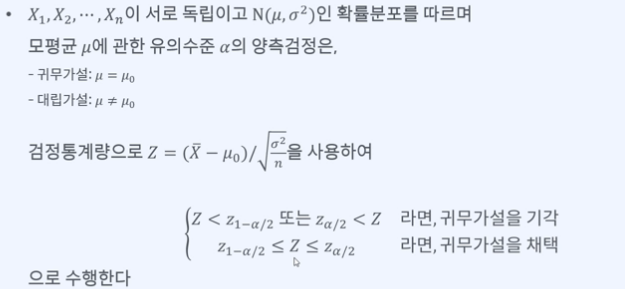

In [26]:
#평균 =6. 유의수준 5%로 양측 검정
#p값이 0.0055로서 0.05보다 크므로 귀무가설 채택


def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean-mean0) / np.sqrt(p_var/n)
    if interval[0] <=z <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
    
    if z <0:
        p = rv.cdf(z) *2
    else:
        p = (1-rv.cdf(z)) *2
    print(f'p값은 {p:.3f}')

In [27]:
pmean_test(sample, 6,0.2)

귀무가설 채택
p값은 0.055


### 정규분포 모분산에 대한 검정
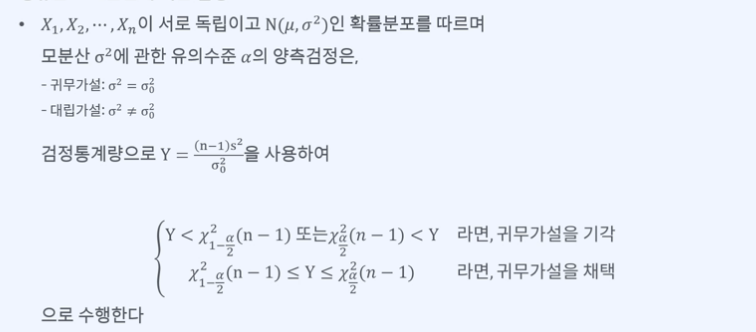


In [28]:
#정규분포 모분산에 대한 검정
#분산 = 0.5에 대해 ㅇ유의수준 5%로 양측검정시
#카이제곱 이용
#p값이 0.047로 0.05보다 작으므로 귀무가설 기각

def pvar_test(sample, var0, alpha=0.05):
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1) #카이제곱
    interval = rv.interval(1-alpha)
    
    y = (n-1) * u_var / var0
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

In [29]:
pvar_test(sample,0.5)

귀무가설을 기각
p값은 0.047


### 정규부포의 모평균(모분산 모를 때)

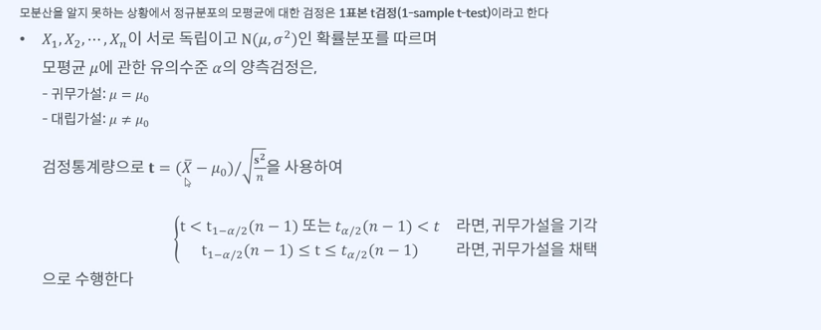

In [32]:
#평균 =6, 유의수준 =0.05 , 양측검정
#p값이 0.091이고 0.05보다 크므로 귀무가설 채택

def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

In [33]:
pmean_test(sample,6)

귀무가설을 채택
p값은 0.091


In [34]:
t, p =stats.ttest_1samp(sample,6)
t,p

(1.781, 0.091)

### 2표본문제 - 대응비교 t검정

- 2개 모집단에 관한 다양한 관계성 검정을 위한 문제로 2개 표본 각각의 대표값 사이에 차이가 있는지 검정을 통해서 문제를 해결함

<br>

**2표본 문제 4가지 검정 방법**

- 모집단에 정규분포를 가정할 수 있는지

- 데이터가 서로 대응이 있는지 독립이 있는지

   - 대응이 있다는 것은 2개 표본의 서로 대응되는 동일한 개체에 대해 다른 조건 측정

      - ex: 환자에게 약을 투여하기 전과 후의 활성화 수치 비교

   - 대응이 없다는 것은 개체가 서로 다른 독립 표본데이터로서 구성됨

      - ex: 1반 학생들과 2반 학생들의 시험 점수 비교

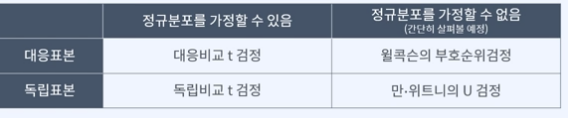




####  대응비교 t검정(Paired t-test)

- 대응하는 데이터가 존재하고, 데이터 차이에 정규분포를 가정할 수 있는 경우에 평균값 차이에 대한 검정 방법

- ex:)

   - 근력운동을 진행하면 집중력 향상 여부 파악을 위해서 20명의 사람을 선정하여 2주간 근력운동 하기 전/후의 집중력 테스트 결과 생성


- 근력운동 전/후 집중력 테스트 결과값 차이 비교(양측 검증)

   - 귀무가설: Mafter - Mbefore=0

   - 대립가설: Mafter - Mbefore !=0
   

In [36]:
training_rel = pd.read_csv('/content/[패스트캠퍼스-확률및통계] 11_training_rel.csv')
print(training_rel.shape)
training_rel.head()

(20, 2)


,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84


In [37]:
training_rel['차'] = training_rel['후'] - training_rel['전']
training_rel.head()

,전,후,차
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25


In [40]:
t,p = stats.ttest_1samp(training_rel['차'],0)
p

0.040

In [41]:
t,p =stats.ttest_rel( training_rel['후'] ,training_rel['전'])
p

0.040

### 분석

p값이 0.04로서 0.05보다 작으므로 귀무가설은 기각되고, 근력운동이 집중력에 유의한 차이를 가져온다

###  2표본 문제 - 독립비교 t검정


**독립비교 t검정(Independent t-test)**

- 대응하는 데이터가 없고, 독립된 2표본 모집단에서 정규분포를 가정할 수 있는 경우의 평균값 차이에 대한 검정 방법

- 예시

   - A학급은 근력운동을 평소에 잘 안함

   - B학급은 평소에 근력운동을 꾸준히 함

- 근력운동을 자주하는 집단과 그렇지 않은 집단간의 집중력 차이가 있는지 여부 파악하여 독립적인 두 학급에서 집중력 테스트 결과를 생성

<br>

- A학급/B학급 집중력 테스트 결과값 차이 비교(양측 검증)

   - 귀무가설: Mafter - Mbefore=0

   - 대립가설: Mafter - Mbefore !=0
   

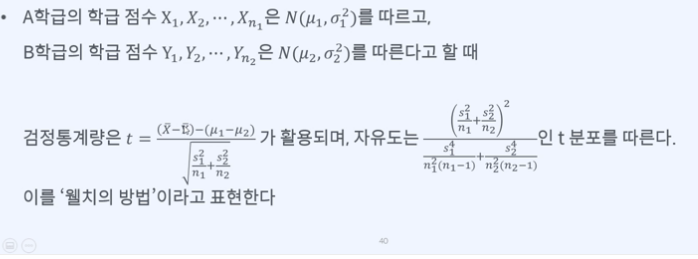

- 대응이 없는 독립표본 데이터이므로 개별 데이터 간의 차이를 구하는 것은 의미가 없다



In [42]:
training_ind = pd.read_csv('/content/[패스트캠퍼스-확률및통계] 11_training_ind.csv')
print(training_ind.shape)
training_ind.head()

(20, 2)


,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [43]:
t, p = stats.ttest_ind(training_ind['A'], training_ind['B'],
                       equal_var=False)
p

0.087

### 윌콕슨의 부호검정

- 대응하는 데이터에서, 독립된 2표본 모집단에서 정규분포를 가정할 수 없는 경우 중앙값 차이에 대한 검정 방법

<br>

**월콕슨의 부호순위검정 방법**


- 방법이름 그대로 대응하는 데이터간의 차이를 절대값을 기준으로 순위화


- 차이의 부호가 마이너스인 것의 순위함 플러스인 것의 순위함을 고려하여 더 작은 쪽이 검정 통계량이 된다. 

- 임계값 기준보다 작으면 차이가 있다는 주장이 가능

- Scipy.stats의 silcoxon함수를 활용하면, 부호의 순위합을 계산하고, 표준화를 수행한 뒤 정규분포로 검정을 통해서 검정통계량 값이 약간 바뀌긴하나 원리의 차이는 없다.

In [46]:
training_rel = pd.read_csv('/content/[패스트캠퍼스-확률및통계] 11_training_rel.csv')
toy_df = training_rel[:6].copy()
toy_df

,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84
5,45,37


In [47]:
diff = toy_df['후'] - toy_df['전']
toy_df['차'] = diff
toy_df

,전,후,차
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25
5,45,37,-8


In [48]:
rank = stats.rankdata(abs(diff)).astype(int)
toy_df['순위'] = rank
toy_df

,전,후,차,순위
0,59,41,-18,5
1,52,63,11,3
2,55,68,13,4
3,61,59,-2,1
4,59,84,25,6
5,45,37,-8,2


In [49]:
r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

r_minus, r_plus

(8, 13)

In [50]:
toy_df['후'] = toy_df['전'] + np.arange(1, 7)
diff = toy_df['후'] - toy_df['전']
rank = stats.rankdata(abs(diff)).astype(int)
toy_df['차'] = diff
toy_df['순위'] = rank
toy_df

,전,후,차,순위
0,59,60,1,1
1,52,54,2,2
2,55,58,3,3
3,61,65,4,4
4,59,64,5,5
5,45,51,6,6


In [51]:
r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

r_minus, r_plus

(0, 21)

In [52]:
toy_df['후'] = toy_df['전'] + [1, -2, -3, 4, 5, -6]
diff = toy_df['후'] - toy_df['전']
rank = stats.rankdata(abs(diff)).astype(int)
toy_df['차'] = diff
toy_df['순위'] = rank
toy_df

,전,후,차,순위
0,59,60,1,1
1,52,50,-2,2
2,55,52,-3,3
3,61,65,4,4
4,59,64,5,5
5,45,39,-6,6


In [53]:
r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

r_minus, r_plus

(11, 10)

In [54]:
T, p = stats.wilcoxon(training_rel['전'], training_rel['후'])
p

0.038

In [55]:
T, p = stats.wilcoxon(training_rel['후'] - training_rel['전'])
p

0.038

In [56]:
n = 10000
diffs = np.round(stats.norm(3, 4).rvs(size=(n, 20)))

In [57]:
cnt = 0
alpha = 0.05
for diff in diffs:
    t, p = stats.ttest_1samp(diff, 0)
    if p < alpha:
        cnt += 1
cnt / n

0.878

In [58]:
cnt = 0
alpha = 0.05
for diff in diffs:
    T, p = stats.wilcoxon(diff)
    if p < alpha:
        cnt += 1
cnt / n

0.869

### 만.위트니의 U검정(Mann-Whitney rank test)


**대응되는 데이터가 없는, 독립된 2표본 모집단에 정규분포를 가정할 수 없는 경우**

- 중앙값 차이에 대한 검정 방법

- Not 부호순위검정

- 2표본 데이터 전체에 대해서 값이 작은 순서대로 순위를 부여하고, 검정통계량은 한 표본 데이터의 순위합을 사용

   - 좋은 순위가 모여있으면, 순위의 합이 작아지고 반대면 커지는 것을 통해서 데이터 편형 반영


- U검정의 검정통계량은 한 표본 데이터의 크기를 n1이라 할 때, 순위합에서 {n1(n1+1)} /2를 뺀 값

- Scipy.stats의 mannwhiteneyu함수를 사용하여 U검정 가능

   - 데이터는 2표본, 파라미터 alternative는 two-sided설정

In [59]:
training_ind = pd.read_csv('/content/[패스트캠퍼스-확률및통계] 11_training_ind.csv')
toy_df = training_ind[:5].copy()
toy_df

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [60]:
rank = stats.rankdata(np.concatenate([toy_df['A'],
                                      toy_df['B']]))
rank_df = pd.DataFrame({'A': rank[:5],
                        'B': rank[5:10]}).astype(int)
rank_df

,A,B
0,3,5
1,6,8
2,1,9
3,10,4
4,2,7


In [61]:
n1 = len(rank_df['A'])
u = rank_df['A'].sum() - (n1*(n1+1))/2
u

7.000

In [62]:
rank_df = pd.DataFrame(np.arange(1, 11).reshape(2, 5).T,
                       columns=['A', 'B'])
rank_df

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [63]:
u = rank_df['A'].sum() - (n1*(n1+1))/2
u

0.000

In [64]:
rank_df = pd.DataFrame(np.arange(1, 11).reshape(2, 5)[::-1].T,
                       columns=['A', 'B'])
rank_df

,A,B
0,6,1
1,7,2
2,8,3
3,9,4
4,10,5


In [65]:
u = rank_df['A'].sum() - (n1*(n1+1))/2
u

25.000

In [66]:
u, p = stats.mannwhitneyu(training_ind['A'], training_ind['B'],
                          alternative='two-sided')
p

0.059

### 카이제곱검정

**독립성 검정**

- 두 변수 X와 Y에 관해 'X와 Y가 독립이다'라는 귀무가설을 기반으로 수행되는 검정

- 독립성 검정에는 카이제곱분포가 사용되기 때문에 카이제곱검정이라고도 불림

In [67]:
#교차집계표(Cross Table) 작성: 도수분포표의 2변수 버전

ad_df = pd.read_csv('/content/[패스트캠퍼스-확률및통계] 11_ad.csv')
n = len(ad_df)
print(n)
ad_df.head()

1000


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [68]:
ad_cross = pd.crosstab(ad_df['광고'], ad_df['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [69]:
#A와B의 각각의 광고를 통해 상품을 구입한 비율이 어떻게 되는지 알아보기
ad_cross['했다'] / (ad_cross['했다'] + ad_cross['하지 않았다'])

광고
A    0.1225
B    0.0850
dtype: float64

In [70]:
#상품을 구입한 사람의 합계, 구입하지 않은 사람으 합계
#
n_not, n_yes = ad_cross.sum()
n_not, n_yes

(900, 100)

In [71]:
#광고A를 본 사람의 합계, 과옥 B를 본 사람의 합계를 구한다
n_adA, n_adB = ad_cross.sum(axis=1)
n_adA, n_adB

(400, 600)

In [72]:
#광고와 상관없이 상품을 구입한 비율은 10%
#광고와 구입이 독립이어서 광고에 따라 상품을 구입한 비율이 변하지 않는다면
#A광고를 본 후 구입하게 될 기대도수는 400*10% = 40
#실제로 관측된 데이터는 관측도수

#모들  셀에서 기대도수의 계산 수행

ad_ef = pd.DataFrame({'했다': [n_adA * n_yes / n,
                              n_adB * n_yes / n],
                      '하지 않았다': [n_adA * n_not / n,
                                   n_adB * n_not / n]},
                      index=['A', 'B'])
ad_ef

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


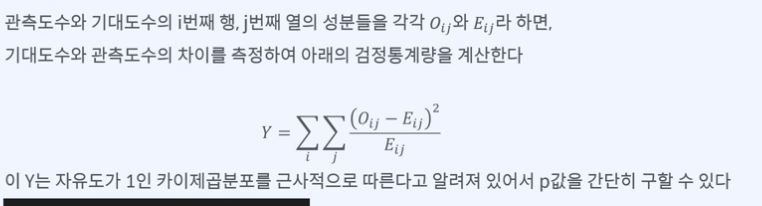

In [73]:
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
y

3.750

In [74]:
rv = stats.chi2(1)
1 - rv.cdf(y)

0.053

In [75]:
#Scipy.stats의 chi2_contingency함수를 사용해도 간단하게 계산 가능
#인수에는 교차집계표와 파라미터인 correction=False를 주면 반환값으로 검정통계량, 자유도, 기대도수 얻음
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,
                                          correction=False)
chi2, p, dof

(3.750, 0.053, 1)

In [76]:
ef

array([[360.,  40.],
       [540.,  60.]])